In [14]:
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
import numpy as np

In [15]:
zf = zipfile.ZipFile('../../Violence_data/geo_corpus.0.0.1.zip')
# if you want to see all files inside zip folder
zf.namelist()

['geo_corpus.0.0.1/',
 'geo_corpus.0.0.1/geo_corpus_2014_03_05.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_07.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_06.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_04_03.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_08.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_12.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_09.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_13.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_14.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_16.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_10.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_23.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_24.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_26.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_04_04.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_25.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_27.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_07_13.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_04_02.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_03_15.csv',
 'geo_corpus.0.0.1/geo_corpus_2014_07_

In [16]:
# Number of csv files
len(zf.namelist())-1

365

In [18]:
# read a specific csv file 
df = pd.read_csv(zf.open('geo_corpus.0.0.1/geo_corpus_2014_03_08.csv'))

In [19]:
df.head()

tweetid     retweetid        date            timestamp  \
0  442123759181250560           NaN  2014-03-08  2014-03-08 02:24:53   
1  442105178834354176           NaN  2014-03-08  2014-03-08 01:11:03   
2  442123950433136640           NaN  2014-03-08  2014-03-08 02:25:38   
3  442123916052410368           NaN  2014-03-08  2014-03-08 02:25:30   
4  442338477745512448  4.420832e+17  2014-03-08  2014-03-08 16:38:06   

         username      geo_x     geo_y lang  \
0  LeslyFanJazmin -103.41760  25.54333   nl   
1  CecyContrerasV -103.52524  25.53538   es   
2     Jesussari87 -103.41760  25.54333   es   
3  LeslyFanJazmin -103.41760  25.54333   es   
4        janeouou -103.41760  25.54333   en   

                                                text  \
0                           @_aprilconp los de gowin   
1  I m at Instituto Tecnológico Superior de Lerdo...   
2  Que triste es que tu propia novia no te crea n...   
3  @JazminconJ buenas noches los quiero mucho : )...   
4  RT @notbestbeliever: but seriously, i love you...   

                         key  ...  pre3geo10  pre3geo20  pre3geo30  pre3geo50  \
0  -103_25__2014-03-08 02:24  ...          0          0          0          0   
1  -103_25__2014-03-08 01:11  ...          0          0          0          0   
2  -103_25__2014-03-08 02:25  ...          0          0          0          0   
3  -103_25__2014-03-08 02:25  ...          0          0          0          0   
4  -103_25__2014-03-08 16:38  ...          0          0          0          0   

   pre3geo70  pre7geo10  pre7geo20  pre7geo30  pre7geo50  pre7geo70  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 50 columns]

In [20]:
df.columns

Index(['tweetid', 'retweetid', 'date', 'timestamp', 'username', 'geo_x',
       'geo_y', 'lang', 'text', 'key', 'post1geo10', 'post1geo20',
       'post1geo30', 'post1geo50', 'post1geo70', 'post2geo10', 'post2geo20',
       'post2geo30', 'post2geo50', 'post2geo70', 'post3geo10', 'post3geo20',
       'post3geo30', 'post3geo50', 'post3geo70', 'post7geo10', 'post7geo20',
       'post7geo30', 'post7geo50', 'post7geo70', 'pre1geo10', 'pre1geo20',
       'pre1geo30', 'pre1geo50', 'pre1geo70', 'pre2geo10', 'pre2geo20',
       'pre2geo30', 'pre2geo50', 'pre2geo70', 'pre3geo10', 'pre3geo20',
       'pre3geo30', 'pre3geo50', 'pre3geo70', 'pre7geo10', 'pre7geo20',
       'pre7geo30', 'pre7geo50', 'pre7geo70'],
      dtype='object')

### Define a function to remove Usernames, RT & HTTP Links From Tweet Data

In [21]:
def remove_usernames_links_rt(tweet):
    tweet = re.sub('@[^\s]+','', tweet)
    tweet = re.sub('http[^\s]+','', tweet)
    tweet = re.sub('RT ', '', tweet)
    return tweet

### Loop over every csv file, read every line, apply the pre-processing function for every tweet

In [22]:
sequences = []

In [23]:
for file in zf.namelist()[1:]:  # Do not read the first item which is not a csv file
    df = pd.read_csv(zf.open(file))
    df['text'] = df['text'].apply(remove_usernames_links_rt)
    # remove white spaces
    df['text'].str.strip()
    # remove rows where text is empty  
    df.dropna(subset = ['text'], inplace=True)
    sequences.append(df)

TypeError: expected string or bytes-like object

In [ ]:
seq = pd.concat(sequences)

### Looking at class distributions

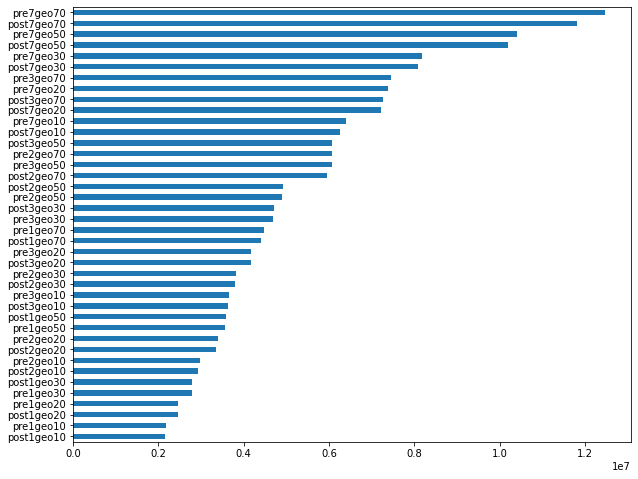

In [28]:
multilabel_columns = seq.columns.tolist()[10:]
plt.rcParams["figure.figsize"] = (10,8)
seq[multilabel_columns].sum().sort_values().plot(kind="barh");

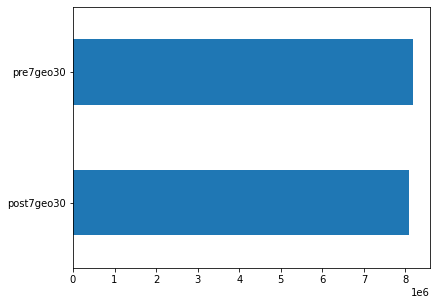

In [29]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset it back to original parameters
seq_7_30 = ['pre7geo30', 'post7geo30']
seq[seq_7_30].sum().sort_values().plot(kind="barh");

In [ ]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset it back to original parameters
seq_7 = ['pre7geo10','pre7geo30','pre7geo50','post7geo10','post7geo30','post7geo50']
seq[seq_7].sum().sort_values().plot(kind="barh");

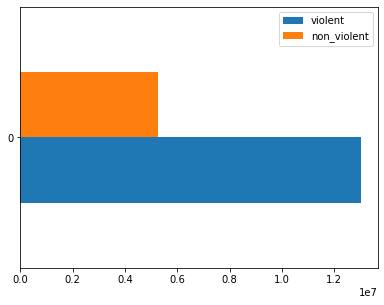

In [30]:
violent = seq[seq[seq_7_30].sum(axis=1) > 0]
non_violent = seq[seq[seq_7_30].sum(axis=1) == 0]

pd.DataFrame(dict(
    violent = [len(violent)],
    non_violent = [len(non_violent)]
)).plot(kind='barh');

In [31]:
seq.shape

(18274976, 50)

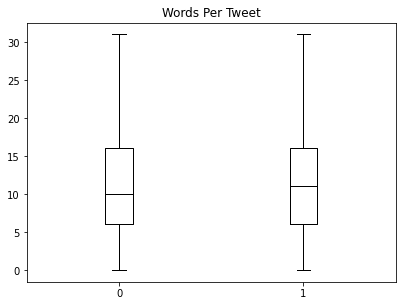

In [32]:
seq["Words Per Tweet"] = seq["text"].str.split().apply(len)
seq.boxplot("Words Per Tweet", by = "pre7geo30", grid = False,
          showfliers=False, color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

### Language distribution

In [33]:
seq['lang'].unique()

array(['ko', 'es', 'en', 'pt', 'vi', 'it', 'und', 'fr', 'et', 'de', 'da',
       'fi', 'pl', 'tr', 'ht', 'tl', 'sl', 'sk', 'sv', 'lv', 'ja', 'in',
       'ar', 'hu', 'el', 'nl', 'zh', 'lt', 'ru', 'bg', 'no', 'is', 'th',
       'ur', 'fa', 'uk', 'iw', 'pa', 'am', 'ne', 'hy', 'bn', 'hi', 'chr',
       'ta', 'iu', 'bo', 'ka', 'gu', 'te', 'lo', 'ro', 'bs', 'cy', 'hr',
       'sr', 'ckb', 'ps', 'ug', 'sn', 'kn', 'sd', 'km', 'si', 'id', 'he',
       'or', 'ml'], dtype=object)

In [34]:
len(seq['lang'].unique())

68

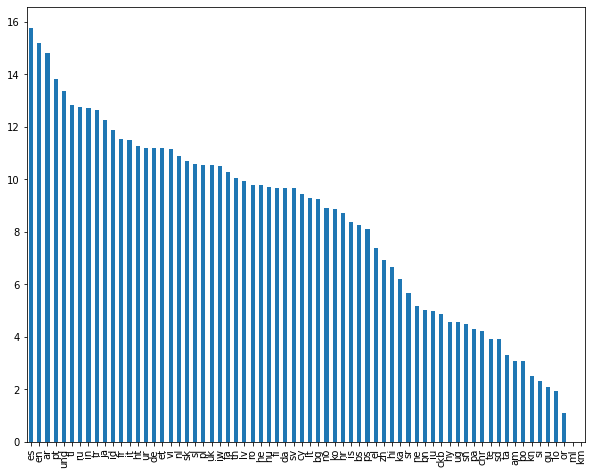

In [35]:
# Log-scale
plt.rcParams["figure.figsize"] = (10,8)
np.log(seq['lang'].value_counts()).sort_values(ascending=False).plot.bar();

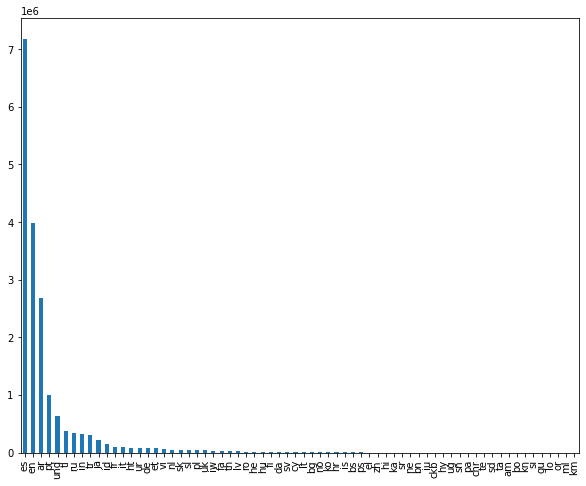

In [36]:
# regular scale
seq['lang'].value_counts().sort_values(ascending=False).plot.bar();